# Кластерный анализ

In [1]:
import pandas as pd

## Иерархический кластерный анализ

Поработаем с файлом beer.xlsx


Описание переменных:

    bier  - Name of the brand
    producer - Name of the producer 
    costs - Spending in dollars for capacity equal to 12 ounces
    calories - calories for the same amount of beer
    alcohol - alcohol content in percent

In [2]:
df1 = pd.read_excel('beer.xlsx')
df1

,bier,producer,costs,calories,alcohol
0,Budweiser,USA,0.43,144,4.7
1,Lowenbrau,USA,0.48,157,4.9
2,Michelob,USA,0.50,162,5.0
3,Kronenbourg,France,0.73,170,5.2
4,Heineken,Holland,0.77,152,5.0
5,Schmidts,USA,0.30,147,4.7
6,Pabst Blue Ribbon,USA,0.38,152,4.9
7,Miller Light,USA,0.43,99,4.3
8,Budweiser Light,USA,0.44,113,3.7
9,Coors Light,USA,0.46,102,4.1


## Предварительный графический анализ данных

<AxesSubplot:xlabel='calories', ylabel='costs'>

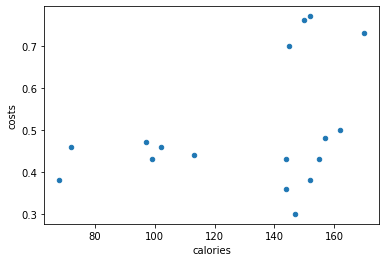

In [3]:
df1.plot('calories', 'costs', kind='scatter') #диаграмма рассеяния

<AxesSubplot:xlabel='z_calories', ylabel='z_costs'>

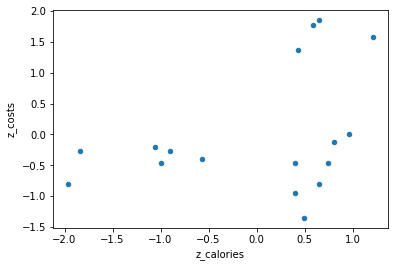

In [4]:
df1['z_calories'] = (df1['calories'] - df1['calories'].mean())/df1['calories'].std()
df1['z_costs'] = (df1['costs'] - df1['costs'].mean())/df1['costs'].std()
df1.plot('z_calories', 'z_costs', kind='scatter')
#стандартизируем значения переменных, поскольку они измерены в разных шкалах

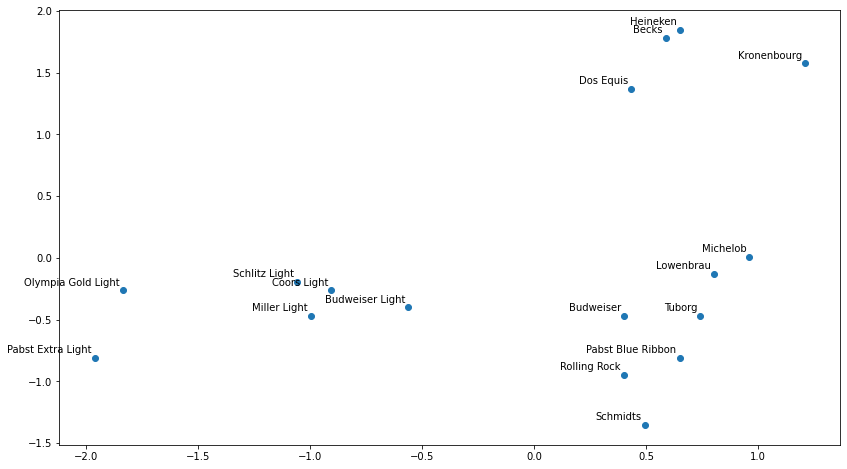

In [5]:
import matplotlib.pyplot as plt
labels = df1['bier']
plt.figure(figsize=(14, 8))
plt.scatter(df1['z_calories'],df1['z_costs'], label='True Position')

for label, x, y in zip(labels, df1['z_calories'], df1['z_costs']): # добавляем метки с названиями брендов
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

Подробнее про linkage: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

Подробнее про fckuster: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html

Подробнее про dendrogram: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

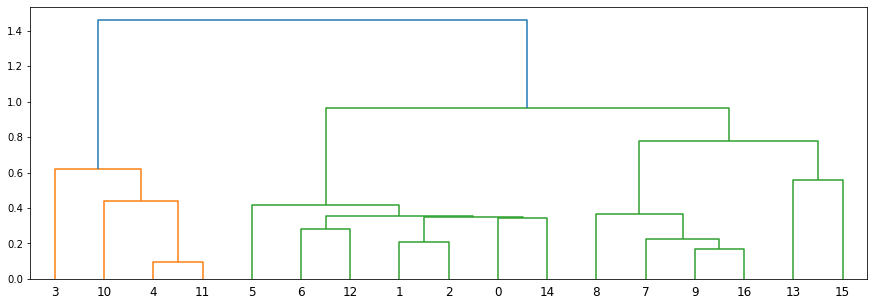

In [7]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['z_calories', 'z_costs']], 'single'))
#Близлежащий сосед / Nearest neighbor / Single-linkage

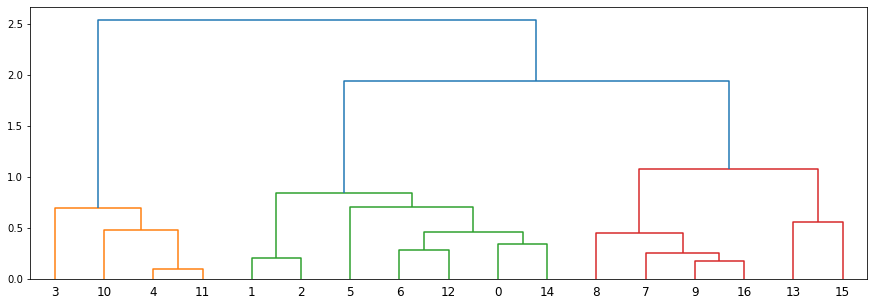

In [8]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['z_calories', 'z_costs']], 'average'))
#Межгрупповые связи / Average Linkage / Between Groups Linkage

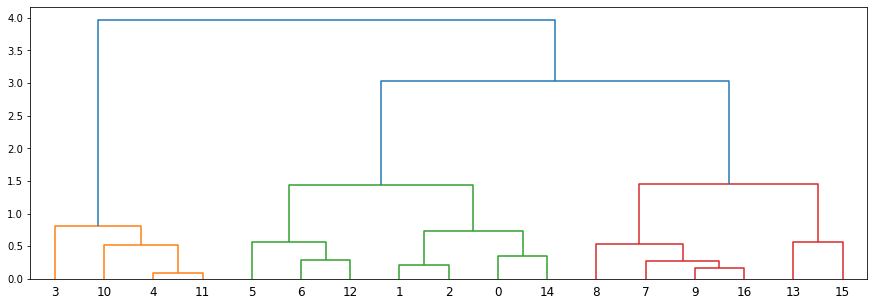

In [9]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['z_calories', 'z_costs']], 'complete'))
#Дальний сосед / Furthest neighbor / Complete-linkage

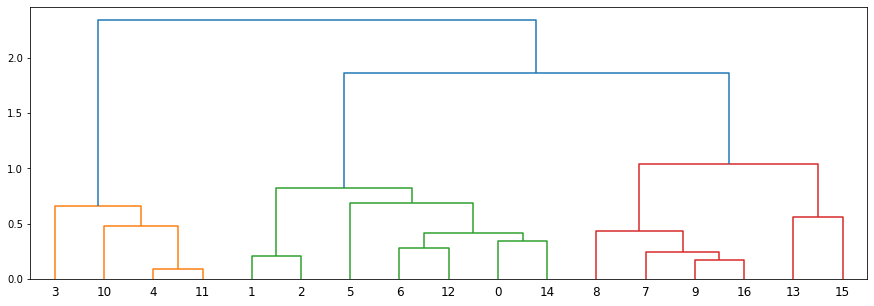

In [10]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['z_calories', 'z_costs']], 'centroid'))
#Центроидная кластеризация / Centroid Clustering

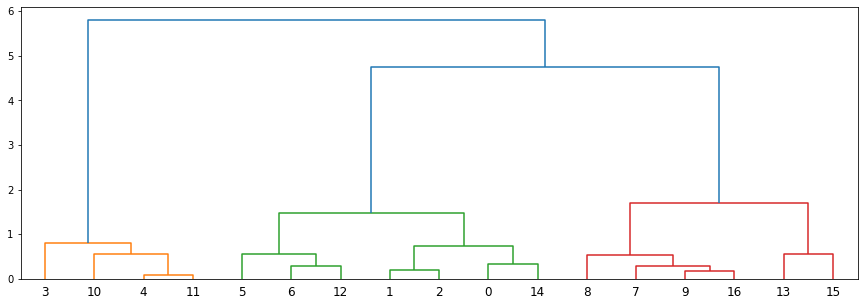

In [11]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['z_calories', 'z_costs']], 'ward'))
#Метод Варда

## Индекс Калински-Харабаша

Подробнее про calinski_harabasz_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html

In [12]:
from sklearn.metrics import calinski_harabasz_score
Z = linkage(df1[['z_calories', 'z_costs']], method='ward', metric='euclidean') 
labels = fcluster(Z, t=3, criterion='maxclust') #параметр t определяет число кластеров
calinski_harabasz_score(df1[['z_calories', 'z_costs']], labels)

50.32657953724121

In [13]:
for k in range (2, 10):
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Число кластеров: {}, индекс {}'.format(k, calinski_harabasz_score(df1[['z_calories', 'z_costs']], labels)))

Число кластеров: 2, индекс 16.64498460748926
Число кластеров: 3, индекс 50.32657953724121
Число кластеров: 4, индекс 51.80382074566064
Число кластеров: 5, индекс 67.0535707144872
Число кластеров: 6, индекс 65.19050945075712
Число кластеров: 7, индекс 66.63167402114675
Число кластеров: 8, индекс 64.58809025811043
Число кластеров: 9, индекс 66.99883144398997


In [14]:
labels = fcluster(Z, t=5, criterion='maxclust') #проводим рассчёты для 3-х кластеров
labels

array([3, 3, 3, 1, 1, 2, 2, 4, 4, 4, 1, 1, 2, 5, 3, 5, 4], dtype=int32)

Про параметр maxclust: https://datascience.stackexchange.com/questions/84594/what-is-criterion-in-flcuster-of-scipy-package

## Добавление переменной "принадлежность к кластеру"

In [15]:
df1['culster_labels'] = labels # создаём новую переменную, отражающую принадлежность наблюдения к кластеру
df1

,bier,producer,costs,calories,alcohol,z_calories,z_costs,culster_labels
0,Budweiser,USA,0.43,144,4.7,0.400407,-0.468980,3
1,Lowenbrau,USA,0.48,157,4.9,0.804471,-0.128268,3
2,Michelob,USA,0.50,162,5.0,0.959880,0.008017,3
3,Kronenbourg,France,0.73,170,5.2,1.208535,1.575291,1
4,Heineken,Holland,0.77,152,5.0,0.649062,1.847861,1
5,Schmidts,USA,0.30,147,4.7,0.493653,-1.354830,2
6,Pabst Blue Ribbon,USA,0.38,152,4.9,0.649062,-0.809692,2
7,Miller Light,USA,0.43,99,4.3,-0.998275,-0.468980,4
8,Budweiser Light,USA,0.44,113,3.7,-0.563130,-0.400837,4
9,Coors Light,USA,0.46,102,4.1,-0.905030,-0.264553,4


## Описательные статистики по кластерам

In [16]:
df1.groupby('culster_labels')[['costs', 'calories']].mean()

,costs,calories
culster_labels,,
1,0.740000,154.250000
2,0.346667,147.666667
3,0.460000,154.500000
4,0.450000,102.750000
5,0.420000,70.000000


In [17]:
df1[['costs', 'calories']].mean()

costs         0.498824
calories    131.117647
dtype: float64

In [18]:
df1['culster_labels'].value_counts()

3    4
1    4
4    4
2    3
5    2
Name: culster_labels, dtype: int64

In [19]:
#Добавить сюда описание кластеров

Поработаем с файлом assess.xlsx


Описание переменных:

    nr  - Identification of the candidate
    name - Name of the candidate 
    t1 - Memory for numbers
    t2 - Mathematical skills
    t3 - Readiness for direct dialogues
    t4 - Ability to prepare algorithms
    t5 - Speech confidence
    t6 - Team Spirit
    t7 - Resourcefulness
    t8 - Cooperation
    t9 - Recognition by others
    t10 - Ability to persuade

In [20]:
df2 = pd.read_excel('assess.xlsx', index_col=0)
df2

,name,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
nr,,,,,,,,,,,
1,Volker R,10,10,9,10,10,10,9,10,10,9
2,Sigrid K,10,10,4,10,5,5,4,5,4,3
3,Elmar M,5,4,10,5,10,4,10,5,3,10
4,Peter B,10,10,9,10,10,10,9,10,10,9
5,Otto R,4,3,5,4,3,10,4,10,10,5
6,Elke M,10,10,4,10,5,4,3,4,5,5
7,Sarah K,4,4,5,5,4,10,5,10,10,6
8,Peter T,4,5,3,4,5,10,4,10,10,4
9,Gudrun M,4,5,10,4,10,5,10,4,3,10


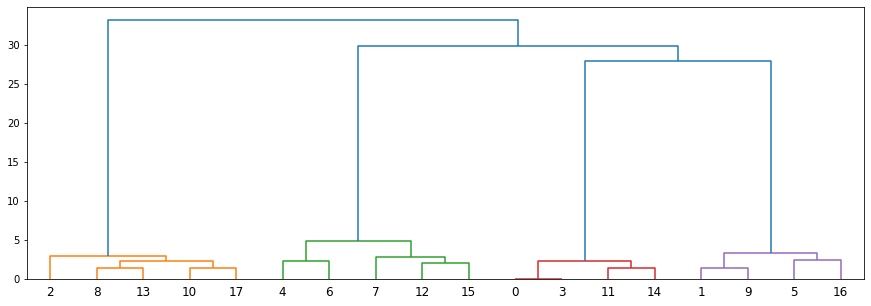

In [21]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df2[['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']], 'ward'))
#Метод Варда

In [22]:
Z = linkage(df2[['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']], method='ward', metric='euclidean') 
for k in range (2, 15):
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Число кластеров: {}, индекс {}'.format(k, calinski_harabasz_score(df2[['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']], labels)))

Число кластеров: 2, индекс 10.014207154732421
Число кластеров: 3, индекс 17.269744416302096
Число кластеров: 4, индекс 155.46624136097822
Число кластеров: 5, индекс 150.59763476347635
Число кластеров: 6, индекс 136.40645161290323
Число кластеров: 7, индекс 126.44037940379404
Число кластеров: 8, индекс 122.75613275613274
Число кластеров: 9, индекс 118.40277777777777
Число кластеров: 10, индекс 115.01683501683502
Число кластеров: 11, индекс 115.01683501683502
Число кластеров: 12, индекс 129.84848484848484
Число кластеров: 13, индекс 148.99305555555554
Число кластеров: 14, индекс 148.99305555555554


In [23]:
labels = fcluster(Z, t=4, criterion='maxclust') #оставляем 4 кластера
df2['culster_labels'] = labels
df2

,name,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,culster_labels
nr,,,,,,,,,,,,
1,Volker R,10,10,9,10,10,10,9,10,10,9,3
2,Sigrid K,10,10,4,10,5,5,4,5,4,3,4
3,Elmar M,5,4,10,5,10,4,10,5,3,10,1
4,Peter B,10,10,9,10,10,10,9,10,10,9,3
5,Otto R,4,3,5,4,3,10,4,10,10,5,2
6,Elke M,10,10,4,10,5,4,3,4,5,5,4
7,Sarah K,4,4,5,5,4,10,5,10,10,6,2
8,Peter T,4,5,3,4,5,10,4,10,10,4,2
9,Gudrun M,4,5,10,4,10,5,10,4,3,10,1


In [24]:
df2['culster_labels'].value_counts()

1    5
2    5
3    4
4    4
Name: culster_labels, dtype: int64

In [25]:
df2.columns

Index(['name', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10',
       'culster_labels'],
      dtype='object')

In [28]:
df2.columns = ['Name', 'Memory for numbers', 'Mathematical skills', 'Readiness for direct dialogues', 
              'Ability to prepare algorithms', 'Speech confidence', 'Team Spirit', 'Resourcefulness',
              'Cooperation', 'Recognition by others', 'Ability to persuade', 'Clusters']
df2

,Name,Memory for numbers,Mathematical skills,Readiness for direct dialogues,Ability to prepare algorithms,Speech confidence,Team Spirit,Resourcefulness,Cooperation,Recognition by others,Ability to persuade,Clusters
nr,,,,,,,,,,,,
1,Volker R,10,10,9,10,10,10,9,10,10,9,3
2,Sigrid K,10,10,4,10,5,5,4,5,4,3,4
3,Elmar M,5,4,10,5,10,4,10,5,3,10,1
4,Peter B,10,10,9,10,10,10,9,10,10,9,3
5,Otto R,4,3,5,4,3,10,4,10,10,5,2
6,Elke M,10,10,4,10,5,4,3,4,5,5,4
7,Sarah K,4,4,5,5,4,10,5,10,10,6,2
8,Peter T,4,5,3,4,5,10,4,10,10,4,2
9,Gudrun M,4,5,10,4,10,5,10,4,3,10,1


In [29]:
df2.groupby('Clusters').mean()

/var/folders/1j/80tkmyj548j8z3tnytfnk_tw0000gn/T/ipykernel_73253/835464809.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('Clusters').mean()


,Memory for numbers,Mathematical skills,Readiness for direct dialogues,Ability to prepare algorithms,Speech confidence,Team Spirit,Resourcefulness,Cooperation,Recognition by others,Ability to persuade
Clusters,,,,,,,,,,
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50
4,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25


In [30]:
df2.groupby('Clusters').mean().T #транспонируем таблицу

/var/folders/1j/80tkmyj548j8z3tnytfnk_tw0000gn/T/ipykernel_73253/1063437957.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('Clusters').mean().T #транспонируем таблицу


Clusters,1,2,3,4
Memory for numbers,4.2,4.8,10.00,10.00
Mathematical skills,4.8,4.4,10.00,10.00
Readiness for direct dialogues,10.0,4.0,9.00,4.25
Ability to prepare algorithms,4.4,4.0,10.00,10.00
Speech confidence,10.0,4.2,10.00,4.75
Team Spirit,4.4,10.0,9.50,4.50
Resourcefulness,10.0,4.4,9.25,3.75
Cooperation,4.0,10.0,9.75,4.25
Recognition by others,3.8,10.0,10.00,4.25
Ability to persuade,10.0,5.0,9.50,4.25


In [31]:
#Добавить сюда описание кластеров

## Кластерный анализ методом k-means

Описание датасета: https://www.kaggle.com/datasnaek/youtube-new

In [32]:
df3 = pd.read_excel('youtube.xlsx')
df3

,video_id,title,channel_title,publish_time,views,likes,dislikes,comment_count,country
0,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,149376127,3093544,1643059,810698,US
1,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,137843120,3014471,1602383,817582,US
2,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,125432237,2912702,1545015,807558,US
3,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,113874632,2811215,1470383,787174,US
4,TyHvyGVs42U,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,2017-11-17T05:00:01.000Z,102012605,2376636,117196,134224,US
...,...,...,...,...,...,...,...,...,...
3368,mE9oqeXj4WY,DOMO WILSON REACTED TO MY SONG!!! (REACTION VI...,Queen Naija,2018-01-09T23:25:37.000Z,1381198,123524,1029,11970,US
3369,ItL6vcUrpUs,MACKLEMORE FEAT DAVE B & TRAVIS THOMPSON - COR...,Macklemore LLC,2017-12-21T17:00:20.000Z,1381081,70142,1790,3131,US
3370,CWAX-tiepMo,RWBY Volume 5: Chapter 14 - Haven's Fate | Roo...,Rooster Teeth,2018-01-27T16:00:00.000Z,1380940,49981,2818,20286,US
3371,B9nVxg3DqAM,Developer Update | Happy Year of the Dog! | Ov...,PlayOverwatch,2018-02-07T00:55:22.000Z,1380249,42754,1225,9455,US


In [33]:
#стандартизируем значения переменных
df3['z_views'] = (df3['views'] - df3['views'].mean())/df3['views'].std()
df3['z_likes'] = (df3['likes'] - df3['likes'].mean())/df3['likes'].std()
df3['z_dislikes'] = (df3['dislikes'] - df3['dislikes'].mean())/df3['dislikes'].std()
df3['z_comment_count'] = (df3['comment_count'] - df3['comment_count'].mean())/df3['comment_count'].std()
df3

,video_id,title,channel_title,publish_time,views,likes,dislikes,comment_count,country,z_views,z_likes,z_dislikes,z_comment_count
0,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,149376127,3093544,1643059,810698,US,15.589827,9.347265,17.683401,9.883878
1,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,137843120,3014471,1602383,817582,US,14.341644,9.093412,17.241942,9.970357
2,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,125432237,2912702,1545015,807558,US,12.998451,8.766698,16.619323,9.844432
3,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,113874632,2811215,1470383,787174,US,11.747606,8.440888,15.809337,9.588360
4,TyHvyGVs42U,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,2017-11-17T05:00:01.000Z,102012605,2376636,117196,134224,US,10.463814,7.045735,1.123107,1.385748
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368,mE9oqeXj4WY,DOMO WILSON REACTED TO MY SONG!!! (REACTION VI...,Queen Naija,2018-01-09T23:25:37.000Z,1381198,123524,1029,11970,US,-0.427225,-0.187555,-0.137661,-0.150055
3369,ItL6vcUrpUs,MACKLEMORE FEAT DAVE B & TRAVIS THOMPSON - COR...,Macklemore LLC,2017-12-21T17:00:20.000Z,1381081,70142,1790,3131,US,-0.427237,-0.358931,-0.129402,-0.261094
3370,CWAX-tiepMo,RWBY Volume 5: Chapter 14 - Haven's Fate | Roo...,Rooster Teeth,2018-01-27T16:00:00.000Z,1380940,49981,2818,20286,US,-0.427253,-0.423655,-0.118245,-0.045586
3371,B9nVxg3DqAM,Developer Update | Happy Year of the Dog! | Ov...,PlayOverwatch,2018-02-07T00:55:22.000Z,1380249,42754,1225,9455,US,-0.427328,-0.446856,-0.135534,-0.181649


In [34]:
X = df3[['z_views', 'z_likes', 'z_dislikes', 'z_comment_count']]
X

,z_views,z_likes,z_dislikes,z_comment_count
0,15.589827,9.347265,17.683401,9.883878
1,14.341644,9.093412,17.241942,9.970357
2,12.998451,8.766698,16.619323,9.844432
3,11.747606,8.440888,15.809337,9.588360
4,10.463814,7.045735,1.123107,1.385748
...,...,...,...,...
3368,-0.427225,-0.187555,-0.137661,-0.150055
3369,-0.427237,-0.358931,-0.129402,-0.261094
3370,-0.427253,-0.423655,-0.118245,-0.045586
3371,-0.427328,-0.446856,-0.135534,-0.181649


In [35]:
import warnings
warnings.filterwarnings("ignore") #не показывать предупреждения

Про KMeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [36]:
from sklearn.cluster import KMeans
for k in range (2, 15):
    labels = KMeans(n_clusters=k).fit_predict(X)
    print('Число кластеров: {}, индекс {}'.format(k, calinski_harabasz_score(X, labels)))

Число кластеров: 2, индекс 3327.1760128427354
Число кластеров: 3, индекс 3931.860823842984
Число кластеров: 4, индекс 4268.26494575675
Число кластеров: 5, индекс 3989.4919446481617
Число кластеров: 6, индекс 4037.701639027547
Число кластеров: 7, индекс 4312.982069869721
Число кластеров: 8, индекс 4292.017722980373
Число кластеров: 9, индекс 4367.853374774393
Число кластеров: 10, индекс 4445.774989312222
Число кластеров: 11, индекс 4517.974858617945
Число кластеров: 12, индекс 4575.357733305149
Число кластеров: 13, индекс 4697.930541804073
Число кластеров: 14, индекс 4789.0993677445285


In [37]:
kmeans_model = KMeans(n_clusters=4).fit_predict(X) #оставляем 4 кластера

In [38]:
df3['Clusters'] = kmeans_model
df3.head()

,video_id,title,channel_title,publish_time,views,likes,dislikes,comment_count,country,z_views,z_likes,z_dislikes,z_comment_count,Clusters
0,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,149376127,3093544,1643059,810698,US,15.589827,9.347265,17.683401,9.883878,1
1,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,137843120,3014471,1602383,817582,US,14.341644,9.093412,17.241942,9.970357,1
2,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,125432237,2912702,1545015,807558,US,12.998451,8.766698,16.619323,9.844432,1
3,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,113874632,2811215,1470383,787174,US,11.747606,8.440888,15.809337,9.588360,1
4,TyHvyGVs42U,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,2017-11-17T05:00:01.000Z,102012605,2376636,117196,134224,US,10.463814,7.045735,1.123107,1.385748,3


In [39]:
df3['Clusters'].value_counts()

0    3053
2     264
3      43
1      13
Name: Clusters, dtype: int64

In [40]:
df3.groupby('Clusters')['z_views', 'z_likes', 'z_dislikes', 'z_comment_count'].mean()

,z_views,z_likes,z_dislikes,z_comment_count
Clusters,,,,
0,-0.213956,-0.234861,-0.100620,-0.154653
1,7.307315,5.908843,15.037658,12.158660
2,1.412803,1.468792,0.170041,0.535895
3,4.307716,5.871012,1.553765,4.014361


In [41]:
#Добавить сюда описание кластеров